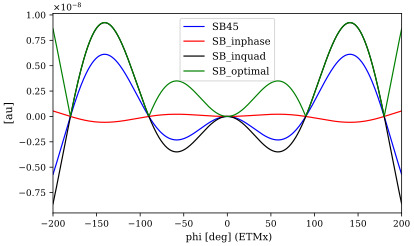

In [6]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
from matplotlib.ticker import FormatStrFormatter

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)
base = finesse.kat()
base.verbose = False
#base.noxaxis= True

Mich = """
l laser1 1.0 0 n1 # laser with P = 1W at the default frequency
s smod 0 n1 nmod1
mod eom {f} 0.2 1 pm 30 nmod1 nmod2
s s0 0 nmod2 n2     # space connecting the laser to something
bs bs1 0.5 0.5 0 0 n2 n3 n4 n5 # 50:50 beam splitter
s Lx 1 n4 n8
s Ly 1 n3 n6
m ETMy 1 0 0 n6 n7
m ETMx 1 0 90 n8 n9 

pd1 SB_inphase {f} 0 n5
pd1 SB_inquad {f} 90 n5
pd1 SB45 {f} 45 n5
pd1 SB_optimal {f} max n5

xaxis ETMx phi lin -200 200 500

#pd1 inphase {f} 0 n5
#pd1 inquad {f} 90 n5
#pd1 inbetween {f} 45 n5
#pd1 optimal 0 max n5
#pd pow_out n5
#ad upper {f} n5
#ad carrir 0 n5
#ad lower -{f} n5

""".format(f=11e6)
base.parse(Mich)
out=base.run()
out.plot()
#plt.plot(out.x,np.abs(out['inphase']+1j*out['inquad']), ls='--',lw=2)
#plt.plot(out.x,np.abs(out['optimal']))
#plt.plot(out.x,np.abs(out['optimal_sb']))
#plt.ylim(0,0.001)